# 2 Régularisation de problèmes mal posés
### Question 2-9. Rappelez la méthode de résolution analytique des moindres carrés.
Le principe des moindres carrées est de trouver une droite qui permet de décrire un nuage de points.
Pour cela on cherche une droite $y = ax + b$ tel que l'écart total entre les points et leur projection sur la droite soit minimum.<br/>

![alt text](../img/least_square.jpg "")

Ici nos $y_i$ sont nos points pratiques et $ax_i + b$ nos points théoriques.<br/>
Pour calculer le résidu entre ces points on on choisit le carrée de la différence, c'est-à-dire $(y_i - ax_i +b))^2$.
On cherche donc a et b qui minimise: \begin{equation}RSS = \sum_{i}^n(y_i - (ax_i +b))^2\end{equation} <br/>
Le minimum d'une fonction se situe au point où les dérivées partielles s'annulent.
On a donc:
\begin{equation}
   \frac{\partial RSS}{\partial b} = -2 \sum_{i}^n(y_i - ax_i - b) = 0
\end{equation}
\begin{equation}
   \sum_{i}^n(y_i - ax_i - b) = 0
\end{equation}
\begin{equation}
   \sum_{i}^n(y_i) = a \sum_{i}^n(x_i + b)
\end{equation}
\begin{equation}
    n \overset{-}{y} = an\overset{-}{x} + nb
\end{equation}
\begin{equation}
    b = \overset{-}{y} - a\overset{-}{x}
\end{equation}
On fait de même avec a:
\begin{equation}
     \frac{\partial RSS}{\partial a} = -2 \sum_{i}^nx_i(y_i - ax_i - b) = 0
\end{equation}
On remplace b par la formule trouver au dessus:
\begin{equation}
    -2 \sum_{i}^nx_i(y_i - ax_i - (\overset{-}{y} - a\overset{-}{x})) = 0 \end{equation}
\begin{equation}
    \sum_{i}^n (x_iy_i) - a\sum_{i}^n(\overset{-}{x} + x_i) - \overset{-}{y} \sum_{i}^n x_i = 0
\end{equation}
\begin{equation}
    \sum_{i}^n (x_iy_i) - \overset{-}{y} \sum_{i}^nx_i = a \sum_{i}^n(\overset{-}{x} + x_i)
\end{equation}
\begin{equation}
    \frac{1}{n} \sum_{i}^n (x_iy_i) - \overset{-}{y} \overset{-}{x} = \frac{1}{n}  a\sum_{i}^n(x_i - \overset{-}{x})
\end{equation}
\begin{equation}
    a = \frac{\frac{1}{n}\sum_{i}^n(x_iy_i) - \overset{-}{y} \overset{-}{x}}{\frac{1}{n}\sum_{i}^n (x_i - \overset{-}{x}} = \frac{Cov(x, y)}{Var(x)}
\end{equation}

### Question 2-10: Lasso et Tikhonov
Le principe des régularisations de Lasso et de Tikhnov est d'ajouter des contraintes supplémentaires dans le but de privilégier une solution particulière dotée de propriétés qui semblent pertinentes.
Ainsi on peut définir les formules de régularisation par:\begin{equation}cost\_function = loss\_function +  penalty\_term\end{equation}


<strong>Régularisation de LASSO : </strong>  La régression lasso pénalise les coefficients par la norme L1. La fonction à minimiser devient:
 $$ \sum_{i}^n(y_i - (w \cdot x_i +b))^2 + \alpha \sum_{j=1}^p \left\lvert{w_j}\right\rvert$$
 
 
<strong>Régularisation de Tikhonov : </strong> Cette stratégie de régularisation rapproche les poids de l'origine en ajoutant un terme de régularisation $\alpha \sum_{j=1}^p w_j^2$ à la fonction objectif. La fonction de coût devient:
 $$ \sum_{i}^n(y_i - (w \cdot x_i +b))^2 + \alpha \sum_{j=1}^p w_j^2$$
 
 
 
λ est une valeur choisie à l'avance qui contrôle la force de notre préférence pour les petits coefficients. Lorsque λ = 0, nous n'imposons aucune préférence, et un λ plus grand force les poids à devenir plus petits. La minimisation avec une régularisation donne lieu à un choix de poids qui permet de faire un compromis entre l'ajustement des données d'entraînement et le fait d'être petit. Cela nous donne des solutions qui ont une pente plus faible, ou qui mettent du poids sur moins de caractéristiques. Cela peut aider, par exemple,  pour contrôler la tendance d'un modèle pour éviter le sur-apprentissage.

 
 De manière géométrique, le fait d'utiliser une régularisation se traduit par chercher le point qui intersecte le terme de pénalisation et la fonction de coût.
![alt text](../img/l1_l2.png "")

Sur ces schémas, on peut voir que chercher l'intersection avec la norme L1 conduit le plus souvent à mettre des coefficients à 0. En effet, la régularisation de LASSO est utiliser pour faire de la sélection de coefficients. Par rapport à la régularisation L2, la régularisation L1 donne une solution plus clairsemée pour une taille suffisante α.

### Question 2-11: Application de LASSO : régularisation de problème mal posé 

In [1]:
import numpy as np

In [2]:
def l1_regularization(X, Y, alpha=1, nb_iter=100):
    w = np.zeros((X.shape[1],1))
    b = np.random.randn(X.shape[1],1)
    hessienne = X.T @ X /(2* X.shape[0])
    for n in range(nb_iter):
        for i in range(X.shape[1]):
            xy = np.mean(X[:,i]* Y)
            xmean = np.mean(X[:,i])
            ymean = np.mean(Y)
            cov = np.sum((X[:,i] - xmean)*(Y - ymean))
            var = np.sum( (X[:,i]-xmean)*(X[:,i]-xmean))
            rho = cov/var            
            
            if rho < -alpha/hessienne[i,i]:
                w[i] = rho + alpha/hessienne[i,i]
            elif rho > alpha/hessienne[i,i]:
                w[i] = rho - alpha/hessienne[i,i]
            else:
                w[i] = 0

            b[i] = ymean - w[i] * xmean
            
    return b,w
def l2_regularization(X, Y, alpha=1, nb_iter=100):
    cov = X.T@ X
    l2 = np.linalg.inv(cov + alpha *np.identity(X.shape[1]))
    w = l2 @ X.T @ Y
    return w

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
for i in range(11):
    test, w = l1_regularization(X, y,alpha=i*0.1)
    print("with alpha = {}".format(i*0.1))
    print(w.reshape(-1))

with alpha = 0.0
[ 203.62556247  -19.73266623  878.39849372  673.09742671  170.55890041
   76.90823328 -549.3130355   553.60556551  986.04252793  517.09844458]
with alpha = 0.1
[ 122.8203954     0.          784.32050992  577.27857939   66.17397441
    0.         -468.34362829  466.26057197  888.48734248  435.95118426]
with alpha = 0.2
[  42.01522832    0.          690.24252612  481.45973208    0.
    0.         -387.37422109  378.91557844  790.93215703  354.80392393]
with alpha = 0.30000000000000004
[   0.            0.          596.16454231  385.64088477    0.
    0.         -306.40481388  291.5705849   693.37697158  273.65666361]
with alpha = 0.4
[   0.            0.          502.08655851  289.82203745    0.
    0.         -225.43540667  204.22559136  595.82178614  192.50940328]
with alpha = 0.5
[   0.            0.          408.00857471  194.00319014    0.
    0.         -144.46599946  116.88059782  498.26660069  111.36214295]
with alpha = 0.6000000000000001
[  0.           0.      

On remarque que plus on augmente alpha, plus le vecteur des poids obtenu W devient plus sparce 

### Application de Tikhonov : régularisation de problème mal posé 

In [4]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
for i in range(11):
    w = l2_regularization(X, y,alpha=i*0.1)
    print("with alpha = {}".format(i*0.1))
    print(w.reshape(-1))

with alpha = 0.0
[ -605.51530039   -73.08738848   861.80729014   102.48046069
 -3406.64331593  2145.54721544  1458.83756494   401.97360326
  1483.3049724     53.75912406]
with alpha = 0.1
[-409.63623492 -133.27275362  611.65820058  105.11199931 -244.17728895
 -243.30685624  -51.20215113    4.99081568  337.50174009   47.58572811]
with alpha = 0.2
[-317.28431435 -125.29235596  477.55395458   96.50202079 -190.40107883
 -210.24798552  -84.83287403    3.3075618   261.73541986   51.68161552]
with alpha = 0.30000000000000004
[-260.04917607 -111.84902054  394.12356029   86.36182579 -161.43902697
 -181.36454324  -90.88069821    5.79386987  216.69673528   50.96404177]
with alpha = 0.4
[-220.63039129  -99.33148696  336.50109496   77.45643833 -141.09599427
 -158.82033801  -89.71507668    7.78571054  185.86194345   48.79381678]
with alpha = 0.5
[-191.68488664  -88.67068746  294.06887007   69.9976529  -125.54336862
 -141.03131357  -86.23840158    9.10687107  163.16353253   46.24204092]
with alpha = 

On remarque que plus on augmente alpha, plus la norme des poids obtenu W decroit 

## Comparaison de l'application des deux regularisation sur un problème mal posé

Afin de pouvoir visualiser l'effet des deux régularisation, on a gardé que la premier dimension de X , ce qui va affecter la régularisation L2, cependant nous n'avons pas réussit a trouver comment faire autrement

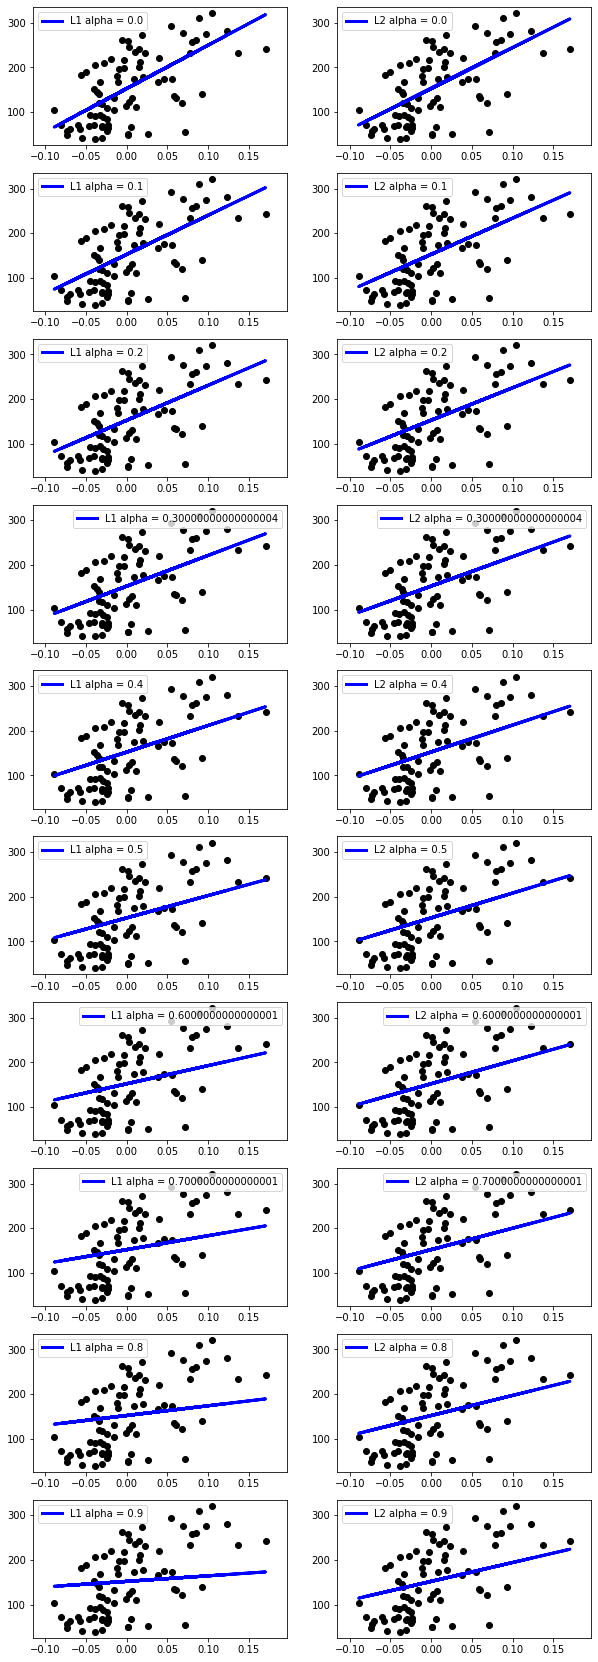

In [6]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-80]
diabetes_X_test = diabetes_X[-80:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-80]
diabetes_y_test = diabetes.target[-80:]

fig, axs = plt.subplots(10,2 ,figsize=(10,30))
for a in range(10):#10):
    alpha = a*0.1
    b, regr = l1_regularization(diabetes_X_train, diabetes_y_train, alpha=alpha, nb_iter=100)
    diabetes_y_pred = diabetes_X_test @ regr.reshape(-1) + b.reshape(-1)
    axs[a,0].scatter(diabetes_X_test, diabetes_y_test,  color='black')
    lab = "L1 alpha = {}".format(alpha)
    axs[a,0].plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3,label=lab)
    axs[a,0].legend()
    
    regr = l2_regularization(diabetes_X_train, diabetes_y_train, alpha=alpha, nb_iter=100)
    diabetes_y_pred = diabetes_X_test @ regr.reshape(-1) + b.reshape(-1)
    
    axs[a,1].scatter(diabetes_X_test, diabetes_y_test,  color='black')
    lab = "L2 alpha = {}".format(alpha)
    axs[a,1].plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3,label=lab)
    axs[a,1].legend()
plt.show()